### Importando bilbiotecas e realizando análise exploratória
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head() 

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


<Axes: >

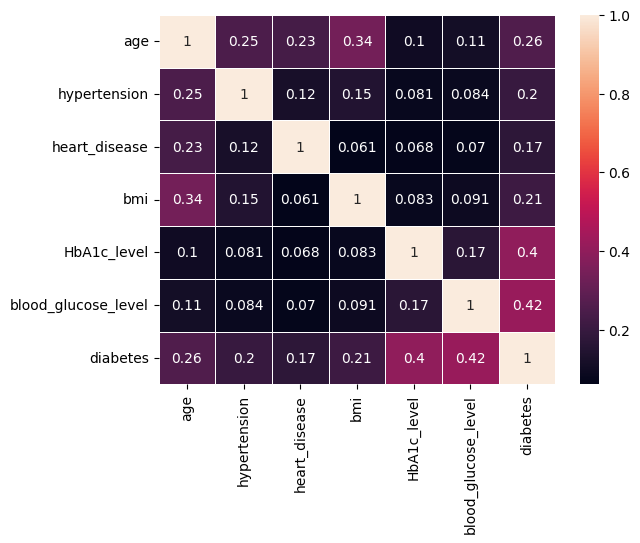

In [6]:
sns.heatmap(df.drop(['gender', 'smoking_history'], axis=1).corr(), annot=True, linewidth=0.5)

### Tratamento de dados
---

In [7]:
df['age'] = df['age'].astype('int32')

In [8]:
def gender_adjust(gender):
    if gender == 'Male':
        return 0
    elif gender == 'Female':
        return 1
    else:
        return 2

In [9]:
df['gender_adjusted'] = df['gender'].apply(gender_adjust)
df.gender_adjusted.value_counts()

gender_adjusted
1    58552
0    41430
2       18
Name: count, dtype: int64

In [10]:
from sklearn.preprocessing import OneHotEncoder

In [11]:
smoking_encoder = OneHotEncoder(handle_unknown='ignore')

In [12]:
smoking_encoder = smoking_encoder.fit(df[['smoking_history']])

In [13]:
smk_transform = smoking_encoder.transform(df[['smoking_history']]).toarray()
smk_columns = smoking_encoder.get_feature_names_out()

In [14]:
smk_data = pd.DataFrame(smk_transform, columns=smk_columns, dtype='int32')
smk_data.head()

,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0,0,0,0,1,0
1,1,0,0,0,0,0
2,0,0,0,0,1,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0


In [15]:
df = pd.concat([df, smk_data], axis=1)
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_adjusted,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,Female,80,0,1,never,25.19,6.6,140,0,1,0,0,0,0,1,0
1,Female,54,0,0,No Info,27.32,6.6,80,0,1,1,0,0,0,0,0
2,Male,28,0,0,never,27.32,5.7,158,0,0,0,0,0,0,1,0
3,Female,36,0,0,current,23.45,5.0,155,0,1,0,1,0,0,0,0
4,Male,76,1,1,current,20.14,4.8,155,0,0,0,1,0,0,0,0


<Axes: >

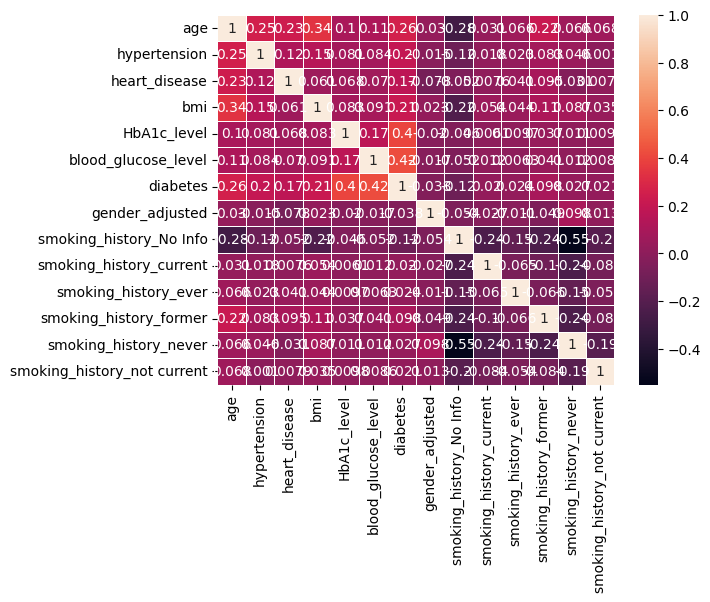

In [16]:
sns.heatmap(df.drop(['gender', 'smoking_history'], axis=1).corr(), annot=True, linewidth=0.5)

## SVM
---

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_adjusted,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,Female,80,0,1,never,25.19,6.6,140,0,1,0,0,0,0,1,0
1,Female,54,0,0,No Info,27.32,6.6,80,0,1,1,0,0,0,0,0
2,Male,28,0,0,never,27.32,5.7,158,0,0,0,0,0,0,1,0
3,Female,36,0,0,current,23.45,5.0,155,0,1,0,1,0,0,0,0
4,Male,76,1,1,current,20.14,4.8,155,0,0,0,1,0,0,0,0


In [19]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['gender','smoking_history'], axis=1), np.ravel(df["diabetes"]), test_size=0.30, random_state=101)

In [20]:
from sklearn.svm import SVC

In [21]:
model = SVC()

In [22]:
model.fit(X_train, y_train)

SVC()

In [23]:
svmPredicts = model.predict(X_test)

### Resultados 
---

In [24]:
from sklearn.metrics import classification_report,confusion_matrix

In [25]:
print(classification_report(y_test, svmPredicts))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     27475
           1       1.00      0.41      0.58      2525

    accuracy                           0.95     30000
   macro avg       0.97      0.71      0.78     30000
weighted avg       0.95      0.95      0.94     30000



In [26]:
print(confusion_matrix(y_test, svmPredicts))

[[27475     0]
 [ 1489  1036]]


### Hiperparametrização 
---

In [32]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001],'kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']}

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [35]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 125 candidates, totalling 625 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=  23.9s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=  27.3s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=  30.4s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=  31.1s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=  25.8s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=1.000 total time=  10.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=1.000 total time=   9.3s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=1.000 total time=  14.9s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=1.000 total time=   6.4s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=1.000 total time=  11.1s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.915 total time=20.2min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rb

ValueError: X should be a square kernel matrix

In [ ]:
grid.best_params_

In [ ]:
grid.best_estimator_

In [ ]:
hyper_predictions = grid.predict(X_test)

### Resultados
---

In [ ]:
print(classification_report(y_test, hyper_predictions))

In [ ]:
print(confusion_matrix(y_test, hyper_predictions))